In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
%matplotlib inline

In [2]:
# change font globally for all plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams["font.family"] = "Times New Roman"

In [3]:
#read your data to work with as a dataframe in python
#####################
# we expect the following columns in that CSV file
#procedure_concept_ids or proceducre_source_concept_id -> different procedure concept codes as available in your procedure_occurrence tabel in OMOP
#count -> we counted the existing procedure_occurrences for each procedure concept id
#concept_code -> this information is needed to extract the OPS chapter, each code starts with a number followed by -, the first number indicates the OPS chapter
#concept_name -> just as additional information
#nummaps -> shows the number of available maps to relationship to SNOMED, options are: 1, 2, 3, 4 for OPS to SNOMED
#####################
#IMPORTANT - change filename + directory to fit your local requirements
df = pd.read_csv('OPS-SNOMED-REL.csv', sep='\t')

In [4]:
#whenever we identified no mapping for an OPS concept - this resulted in a string value null, we need to change to 0
df['nummaps'] = [0 if i == "(null)" else i for i in df['nummaps']]

In [5]:
#extract the first character from the column concept_code and insert this number into a new column named chapter
df['chapter'] = [i[:1] for i in df['concept_code']]

In [6]:
#new file structure export to csv, if needed
df.to_csv('OPS-SNOMED-REL.csv', sep='\t', index=False)

,procedure_source_concept_id,count,concept_code,nummaps,chapter
0,42780677,104277,3-990,1,3
1,42767063,41521,3-200,1,3
2,42767744,34283,3-225,1,3
3,42765553,27602,3-222,1,3
4,42748311,26620,8-822,0,8
...,...,...,...,...,...
14036,42783623,1,1-620.02,0,1
14037,42783628,1,5-136.3,0,5
14038,42783630,1,5-192.01,0,5
14039,42783656,1,5-135.0,0,5


In [ ]:
#descriptive statistics, to get details on the data
#first done for the whole data set and afterwards, subgroups have been generated to check on the different mapping level:
#no map
#1-1
#1-2
#1-3
#1-4

df['count'].describe()
len(df.index)
df['count'].sum()

In [ ]:
#no map data
df_nummaps0 = df.loc[(df['nummaps'] =='0')]
len(df_nummaps0.index)
df_nummaps0['count'].sum()
df_nummaps0['count'].describe()

In [ ]:
#1-1 map
df_nummaps1 = df.loc[(df['nummaps'] =='1')]
len(df_nummaps1.index)
df_nummaps1['count'].sum()
df_nummaps1['count'].describe()

In [ ]:
#1-2 map
df_nummaps2 = df.loc[(df['nummaps'] =='2')]
len(df_nummaps2.index)
df_nummaps2['count'].sum()
df_nummaps2['count'].describe()

In [ ]:
#1-3 map
df_nummaps3 = df.loc[(df['nummaps'] =='3')]
len(df_nummaps3.index)
df_nummaps3['count'].sum()
df_nummaps3['count'].describe()

In [ ]:
#1-4 map
df_nummaps4 = df.loc[(df['nummaps'] =='4')]
len(df_nummaps4.index)
df_nummaps4['count'].sum()
df_nummaps4['count'].describe()

In [8]:
# prepare data for the stacked barplot

grouped = df.groupby(['chapter', 'nummaps']).sum()  #.reset_index(name='size')
del grouped['procedure_source_concept_id']
grouped

count
chapter nummaps        
1       0         24839
        1        107741
        2         54750
        3          4641
        4           309
3       0          6078
        1        344739
        2         88105
        4           169
5       0        134357
        1        179096
        2         66658
        3         20512
        4           291
6       0         12406
        1          1066
        2           590
8       0        134544
        1        191790
        2         37338
        3         58054
        4          1051
9       0         78272
        1        289403
        2         11296

In [20]:
#prepare colors, level of mapping for the stacked chart
s_sort = grouped.groupby(level=[0]).sum().sort_values(ascending=False, by='count')
cmp = plt.cm.get_cmap('Greys')

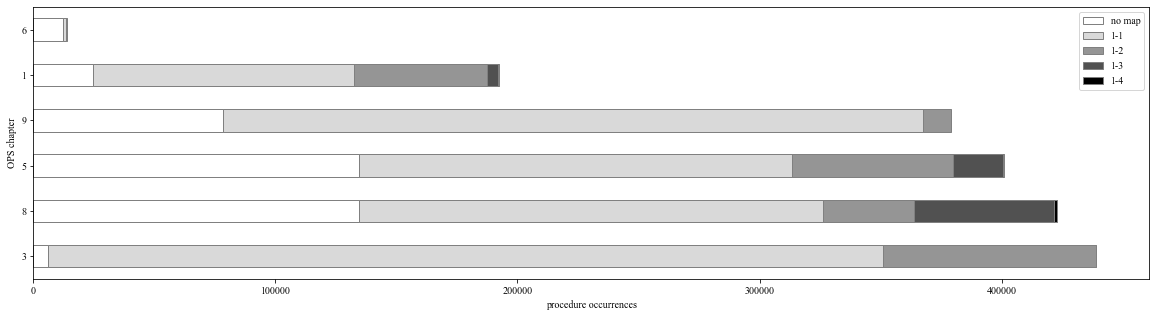

In [22]:
grouped = grouped.reindex(index=s_sort.index, level=0)
#plot the stacked bar plot 
ax = grouped.unstack().plot.barh(stacked=True, cmap=cmp, edgecolor='grey', figsize = (20,5), rot=0)
ax.set(xlabel='procedure occurrences', ylabel='OPS chapter')
ax.legend(['no map','1-1','1-2','1-3','1-4'])  #, title='nummaps')
fig = ax.get_figure()

In [15]:
#save figure, change filename and directory if required
fig.savefig('/barplot.png', dpi=300)